In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
model=pd.read_csv('Leads.csv')
model.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
model.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
model.shape

(9240, 37)

In [6]:
(model.isnull().sum()/len(model.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# Model cleanup

In [7]:
## Drop the coulumns which has null values more than 45% 
model_2=model.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
'Asymmetrique Profile Score'],axis=1)

In [8]:
(model_2.isnull().sum()/len(model_2.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
model_3=model_2.rename(columns={'Lead Source':'Lead_Source','Page Views Per Visit':'Page_Views_Per_Visit','Last Activity':'Last_Activity'})
model_3.head()

,Prospect ID,Lead Number,Lead Origin,Lead_Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [10]:
model_3.TotalVisits.value_counts(normalize=True)*100

TotalVisits
0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: proportion, dtype: float64

In [11]:
model_3=model_3[~model_3.Lead_Source.isnull()]

In [12]:
model_3.Lead_Source.isnull().sum()

0

In [13]:
TotalVisits_mode=model_3.TotalVisits.mode()[0]
TotalVisits_mode

0.0

In [14]:
model_3.TotalVisits.fillna(TotalVisits_mode,inplace=True)

In [15]:
model_3.TotalVisits.value_counts(normalize=True)

TotalVisits
0.0      0.248914
2.0      0.182421
3.0      0.141895
4.0      0.121686
5.0      0.085072
6.0      0.050630
1.0      0.042916
7.0      0.033572
8.0      0.024337
9.0      0.017818
10.0     0.012386
11.0     0.009344
13.0     0.005215
12.0     0.004889
14.0     0.003911
16.0     0.002282
15.0     0.001956
17.0     0.001738
18.0     0.001630
20.0     0.001304
19.0     0.000978
21.0     0.000652
23.0     0.000652
24.0     0.000543
25.0     0.000543
27.0     0.000543
22.0     0.000326
29.0     0.000217
28.0     0.000217
26.0     0.000217
141.0    0.000109
55.0     0.000109
30.0     0.000109
43.0     0.000109
74.0     0.000109
41.0     0.000109
54.0     0.000109
115.0    0.000109
251.0    0.000109
32.0     0.000109
42.0     0.000109
Name: proportion, dtype: float64

In [16]:
(model_3.isnull().sum()/len(model_2.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead_Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page_Views_Per_Visit                              1.406926
Last_Activity                                     1.093074
Country                                          26.255411
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
model_3.Page_Views_Per_Visit.value_counts(normalize=True)*100

Page_Views_Per_Visit
0.00    23.815296
2.00    19.770774
3.00    13.180516
4.00     9.874366
1.00     7.174344
          ...    
3.43     0.011020
2.56     0.011020
6.33     0.011020
1.64     0.011020
2.08     0.011020
Name: proportion, Length: 114, dtype: float64

In [18]:
############ Page_Views_Per_Visit--Cleanup

In [19]:
model_3.Page_Views_Per_Visit.isnull().sum()

130

In [20]:
Page_Views_Per_Visit_mode=model_3.Page_Views_Per_Visit.mode()[0]
Page_Views_Per_Visit_mode

0.0

In [21]:
model_3.Page_Views_Per_Visit.fillna(Page_Views_Per_Visit_mode,inplace=True)

In [22]:
### model cleanup--Last Activity

In [23]:
model_3.Last_Activity.isnull().sum()

101

In [24]:
Last_Activity_mode=model_3.Last_Activity.mode()[0]
Last_Activity_mode

'Email Opened'

In [25]:
model_3.Last_Activity.value_counts(normalize=True)*100

Last_Activity
Email Opened                    37.701857
SMS Sent                        29.913215
Olark Chat Conversation         10.688784
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.526310
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      1.021641
Unsubscribed                     0.648138
Had a Phone Conversation         0.329562
Approached upfront               0.098869
View in browser link Clicked     0.065912
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: proportion, dtype: float64

In [26]:
model_3.Last_Activity.fillna(Last_Activity_mode,inplace=True)

In [27]:
model_3.Last_Activity.value_counts(normalize=True)*100

Last_Activity
Email Opened                    38.385485
SMS Sent                        29.584963
Olark Chat Conversation         10.571491
Page Visited on Website          6.953498
Converted to Lead                4.650152
Email Bounced                    3.487614
Email Link Clicked               2.900913
Form Submitted on Website        1.260322
Unreachable                      1.010430
Unsubscribed                     0.641026
Had a Phone Conversation         0.325945
Approached upfront               0.097784
View in browser link Clicked     0.065189
Email Received                   0.021730
Email Marked Spam                0.021730
Visited Booth in Tradeshow       0.010865
Resubscribed to emails           0.010865
Name: proportion, dtype: float64

In [28]:
#### Cleanup---Country                                          

In [29]:
model_3.Country.value_counts(normalize=True)*100

Country
India                   95.765713
United States            1.017999
United Arab Emirates     0.781942
Singapore                0.354087
Saudi Arabia             0.309826
United Kingdom           0.221304
Australia                0.191797
Qatar                    0.147536
Hong Kong                0.103275
Bahrain                  0.103275
Oman                     0.088522
France                   0.088522
unknown                  0.073768
South Africa             0.059014
Nigeria                  0.059014
Germany                  0.059014
Kuwait                   0.059014
Canada                   0.059014
Sweden                   0.044261
China                    0.029507
Asia/Pacific Region      0.029507
Uganda                   0.029507
Bangladesh               0.029507
Italy                    0.029507
Belgium                  0.029507
Netherlands              0.029507
Ghana                    0.029507
Philippines              0.029507
Russia                   0.014754
Switze

In [30]:
## Mode operation
Country_mode=model_3.Country.mode()[0]
Country_mode

model_3.Country.fillna(Country_mode,inplace=True)

model_3.Country.value_counts(normalize=True)*100

Country
India                   96.881791
United States            0.749674
United Arab Emirates     0.575837
Singapore                0.260756
Saudi Arabia             0.228162
United Kingdom           0.162973
Australia                0.141243
Qatar                    0.108648
Hong Kong                0.076054
Bahrain                  0.076054
Oman                     0.065189
France                   0.065189
unknown                  0.054324
South Africa             0.043459
Nigeria                  0.043459
Germany                  0.043459
Kuwait                   0.043459
Canada                   0.043459
Sweden                   0.032595
China                    0.021730
Asia/Pacific Region      0.021730
Uganda                   0.021730
Bangladesh               0.021730
Italy                    0.021730
Belgium                  0.021730
Netherlands              0.021730
Ghana                    0.021730
Philippines              0.021730
Russia                   0.010865
Switze

In [31]:
#### Model clean---- Specialization

In [32]:
### converted to NaN
model_3['Specialization'] = model_3['Specialization'].replace('Select',np.nan)

model_3=model_3[~model_3.Specialization.isnull()]

In [33]:
model_3.Specialization.value_counts(normalize=True)

Specialization
Finance Management                   0.166268
Human Resource Management            0.144737
Marketing Management                 0.143028
Operations Management                0.085783
Business Administration              0.068865
IT Projects Management               0.062543
Supply Chain Management              0.059638
Banking, Investment And Insurance    0.057758
Travel and Tourism                   0.034689
Media and Advertising                0.034689
International Business               0.030417
Healthcare Management                0.026999
Hospitality Management               0.019481
E-COMMERCE                           0.018968
Retail Management                    0.017088
Rural and Agribusiness               0.012474
E-Business                           0.009740
Services Excellence                  0.006835
Name: proportion, dtype: float64

In [34]:
(model_3.isnull().sum()/len(model_3.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead_Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page_Views_Per_Visit                              0.000000
Last_Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
How did you hear about X Education               13.157895
What is your current occupation                  21.479836
What matters most to you in choosing a course    21.496924
Search                                            0.0000

In [35]:
## model cleanup---How did you hear about X Education

In [36]:
model_3['How did you hear about X Education'].value_counts(normalize=True)

How did you hear about X Education
Select                   0.617080
Online Search            0.155647
Word Of Mouth            0.067690
Student of SomeSchool    0.059819
Other                    0.035419
Multiple Sources         0.029122
Advertisements           0.013184
Social Media             0.012987
Email                    0.004723
SMS                      0.004329
Name: proportion, dtype: float64

In [37]:
model_3['How did you hear about X Education'].head(50)

2                    Select
3             Word Of Mouth
6             Online Search
8                       NaN
9             Word Of Mouth
10                   Select
11                   Select
12                   Select
13                   Select
14                   Select
18         Multiple Sources
20            Online Search
22           Advertisements
23    Student of SomeSchool
24                   Select
25                    Other
26                   Select
27            Online Search
29                   Select
30                   Select
34                   Select
35                   Select
36            Word Of Mouth
37    Student of SomeSchool
39                    Email
41            Word Of Mouth
43            Online Search
44                   Select
45                    Other
46                   Select
48                   Select
51            Online Search
52                   Select
56            Online Search
57                   Select
58                  

In [38]:
### converted to NaN
model_3['How did you hear about X Education']=model_3['How did you hear about X Education'].replace('Select',np.nan)
model_3=model_3[~model_3['How did you hear about X Education'].isnull()]

In [39]:
(model_3.isnull().sum()/len(model_3.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead_Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page_Views_Per_Visit                              0.000000
Last_Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
How did you hear about X Education                0.000000
What is your current occupation                  25.077081
What matters most to you in choosing a course    25.077081
Search                                            0.0000

In [40]:
#### Model cleanup -- What is your current occupation 

In [41]:
model_3['What is your current occupation'].value_counts(normalize=True)*100

What is your current occupation
Unemployed              87.517147
Working Professional    10.219479
Student                  1.920439
Other                    0.137174
Housewife                0.137174
Businessman              0.068587
Name: proportion, dtype: float64

In [42]:
model_3['What is your current occupation'].head(21)

3               Unemployed
6               Unemployed
9                      NaN
18              Unemployed
20              Unemployed
22              Unemployed
23              Unemployed
25              Unemployed
27              Unemployed
36              Unemployed
37    Working Professional
39              Unemployed
41              Unemployed
43                     NaN
45              Unemployed
51              Unemployed
56              Unemployed
60              Unemployed
65              Unemployed
71              Unemployed
76    Working Professional
Name: What is your current occupation, dtype: object

In [43]:
##Removing this column as it contains lots of information on Unemployed data

model_3=model_3.drop('What is your current occupation',axis=1)

In [44]:
model_3.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead_Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                        0
Total Time Spent on Website                        0
Page_Views_Per_Visit                               0
Last_Activity                                      0
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What matters most to you in choosing a course    488
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [45]:
### Model cleaup --- What matters most to you in choosing a course

In [46]:
model_3['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects    100.0
Name: proportion, dtype: float64

In [47]:
## removing column

model_3=model_3.drop('What matters most to you in choosing a course',axis=1)

In [48]:
(model_3.isnull().sum()/len(model_3.index))*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead_Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page_Views_Per_Visit                         0.000000
Last_Activity                                0.000000
Country                                      0.000000
Specialization                               0.000000
How did you hear about X Education           0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

In [49]:
## Model cleanup--Tags

In [50]:
model_3.Tags.value_counts(normalize=True)*100

Tags
Will revert after reading the email                  39.581831
Ringing                                              24.513338
Interested in other courses                           7.426099
Closed by Horizzon                                    4.830570
Busy                                                  4.686373
switched off                                          4.181687
Interested  in full time MBA                          2.956020
Lost to EINS                                          2.523432
Already a student                                     2.307138
Graduation in progress                                1.730353
Diploma holder (Not Eligible)                         1.658255
Not doing further education                           1.225667
invalid number                                        0.576784
wrong number given                                    0.432588
opp hangup                                            0.360490
in touch with EINS                                

In [51]:
model_3.Tags.isnull().sum()

559

In [52]:
model_3.Tags.head(50)

3                                  Ringing
6      Will revert after reading the email
9                                      NaN
18                                     NaN
20             Interested in other courses
22     Will revert after reading the email
23                                 Ringing
25                                    Busy
27     Will revert after reading the email
36                                 Ringing
37     Will revert after reading the email
39     Will revert after reading the email
41                                    Busy
43                                     NaN
45                                 Ringing
51                       Already a student
56                                    Busy
60             Interested in other courses
65     Will revert after reading the email
71                                 Ringing
76     Will revert after reading the email
78                      in touch with EINS
84     Will revert after reading the email
92         

In [53]:
model_3=model_3[~model_3.Tags.isnull()]

In [54]:
model_3.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead_Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page_Views_Per_Visit                         0
Last_Activity                                0
Country                                      0
Specialization                               0
How did you hear about X Education           0
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More 

In [55]:
model_3['Lead Profile'].value_counts(normalize=True)

Lead Profile
Select                         0.624454
Potential Lead                 0.269287
Other Leads                    0.093886
Student of SomeSchool          0.008006
Dual Specialization Student    0.002911
Lateral Student                0.001456
Name: proportion, dtype: float64

In [56]:
model_3['Lead Profile'].mode()[0]

'Select'

In [57]:
model_3=model_3[~model_3['Lead Profile'].isnull()]

In [58]:
model_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 3 to 9231
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               1374 non-null   object 
 1   Lead Number                               1374 non-null   int64  
 2   Lead Origin                               1374 non-null   object 
 3   Lead_Source                               1374 non-null   object 
 4   Do Not Email                              1374 non-null   object 
 5   Do Not Call                               1374 non-null   object 
 6   Converted                                 1374 non-null   int64  
 7   TotalVisits                               1374 non-null   float64
 8   Total Time Spent on Website               1374 non-null   int64  
 9   Page_Views_Per_Visit                      1374 non-null   float64
 10  Last_Activity                            

# Univariate Analysis

In [59]:
model_3.head()

,Prospect ID,Lead Number,Lead Origin,Lead_Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Modified
20,c4419c99-b002-408b-a6fd-fa100716592c,660479,Landing Page Submission,Google,No,No,0,1.0,233,1.0,...,No,No,Interested in other courses,No,No,Select,Mumbai,No,No,Modified
22,8fd38b83-5c32-4277-bcfb-499f34a01c56,660471,Landing Page Submission,Google,No,No,1,1.0,1013,1.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Modified
23,ecbc6e69-29a9-44bf-804a-13079ef301bc,660461,Landing Page Submission,Google,No,No,0,4.0,771,4.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Email Link Clicked


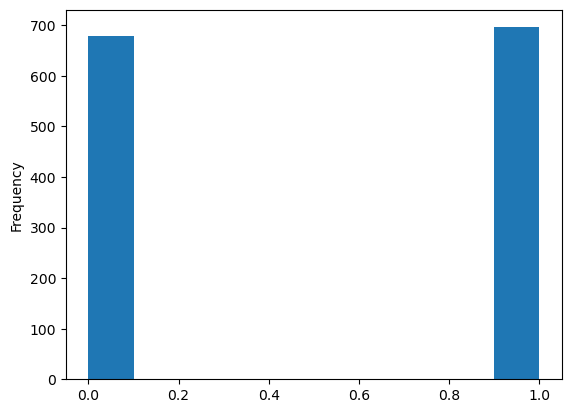

In [60]:
model_3.Converted.plot.hist()
plt.show()

In [61]:
model_3.Converted.value_counts(normalize=True)

Converted
1    0.50655
0    0.49345
Name: proportion, dtype: float64

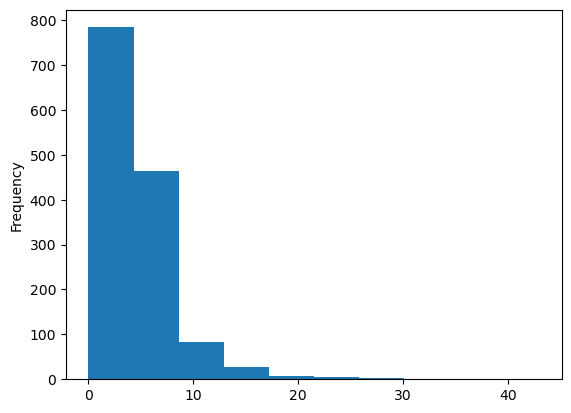

In [62]:
## TotalVisits
model_3.TotalVisits.plot.hist()
plt.show()

In [63]:
model_3.TotalVisits.describe()

count    1374.000000
mean        4.945415
std         3.253874
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        43.000000
Name: TotalVisits, dtype: float64

In [64]:
model_3.TotalVisits.value_counts(normalize=True)*100

TotalVisits
4.0     25.909753
3.0     16.885007
5.0     16.593886
2.0     12.299854
6.0      8.224163
7.0      5.385735
8.0      3.566230
9.0      2.692868
1.0      1.892285
10.0     1.601164
11.0     1.091703
13.0     0.800582
12.0     0.655022
14.0     0.582242
15.0     0.218341
18.0     0.218341
17.0     0.218341
23.0     0.145560
27.0     0.145560
24.0     0.145560
19.0     0.145560
16.0     0.145560
20.0     0.145560
29.0     0.072780
22.0     0.072780
0.0      0.072780
43.0     0.072780
Name: proportion, dtype: float64

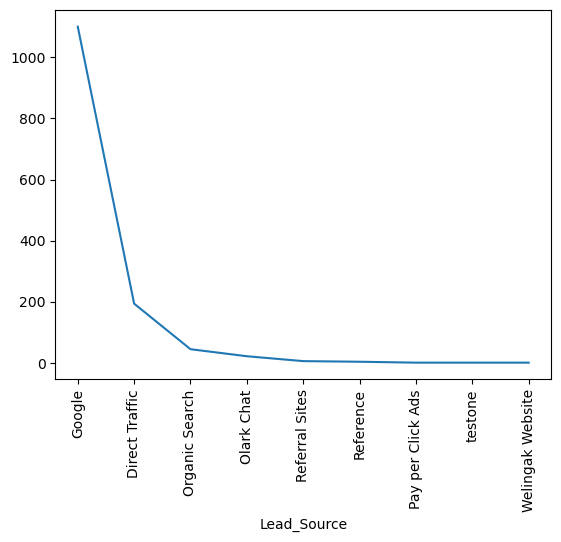

In [65]:
###
model_3.Lead_Source.value_counts().plot()
plt.xticks(rotation = 90)
plt.show()

# most of the lead source was found in google only

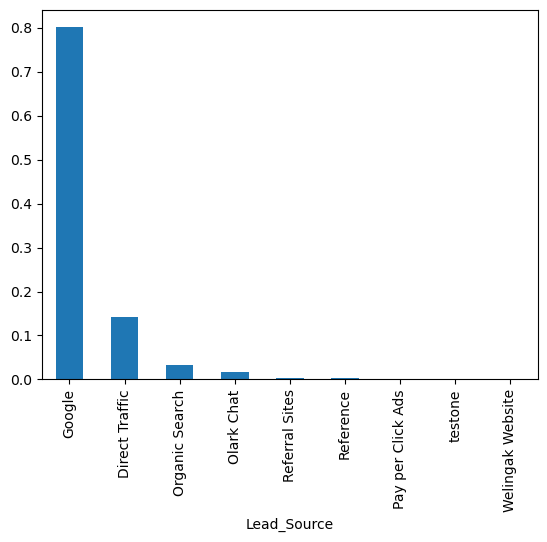

In [66]:
##Lead Source
model_3.Lead_Source.value_counts(normalize=True).plot.bar()
plt.show()

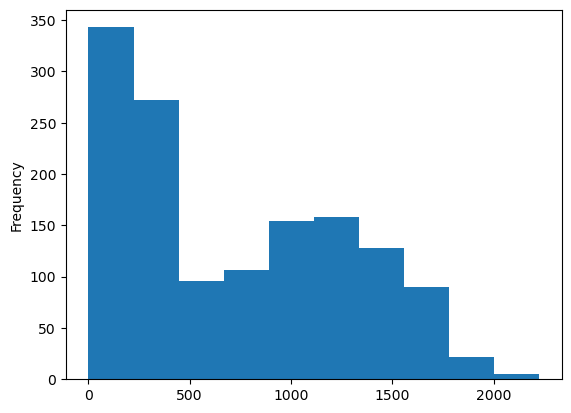

In [67]:
####Total Time Spent on Website
model_3['Total Time Spent on Website'].plot.hist()
plt.show()
# Number of people who spent time on website are fall between 0 to 500.

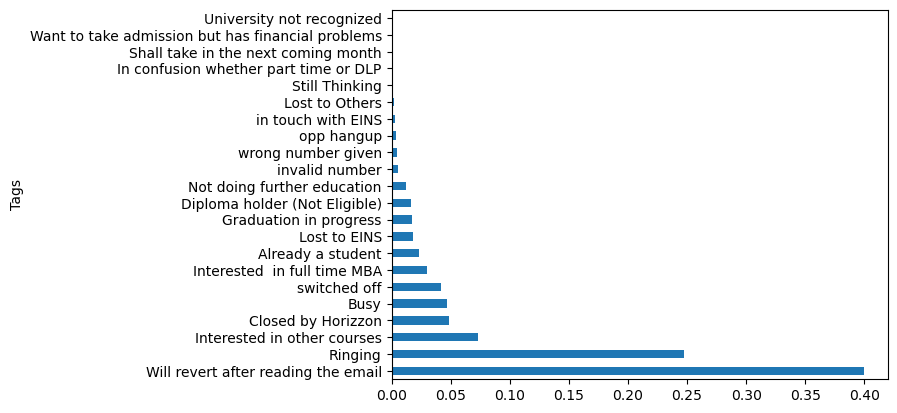

In [68]:
##Tags
model_3.Tags.value_counts(normalize=True).plot.barh()
plt.show()

In [69]:
model_3.Tags.value_counts(normalize=True)*100

# almost 5% of 1400(approx) people are about to join this programe

Tags
Will revert after reading the email                  39.956332
Ringing                                              24.745269
Interested in other courses                           7.278020
Closed by Horizzon                                    4.876274
Busy                                                  4.730713
switched off                                          4.221252
Interested  in full time MBA                          2.983988
Already a student                                     2.328967
Lost to EINS                                          1.819505
Graduation in progress                                1.746725
Diploma holder (Not Eligible)                         1.673945
Not doing further education                           1.237263
invalid number                                        0.582242
wrong number given                                    0.436681
opp hangup                                            0.363901
in touch with EINS                                

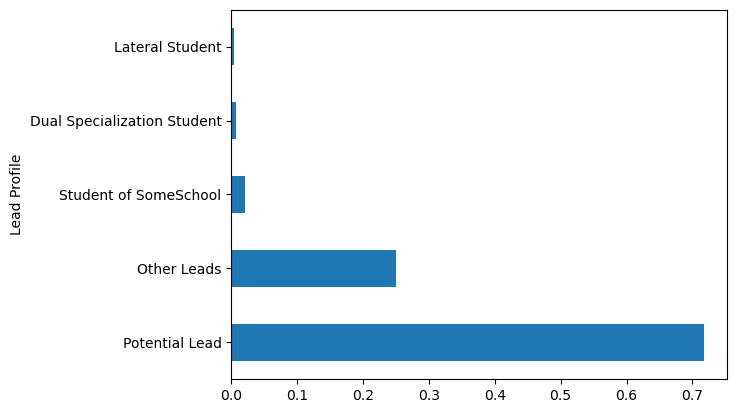

In [70]:
##Lead Profile
#model_3['Lead Profile'].value_counts(normalize=True).plot.barh()
#plt.show()

model_3[~(model_3['Lead Profile']=='Select')]['Lead Profile'].value_counts(normalize=True).plot.barh()
plt.show()

# almost 27% people are willing to join this programme

In [71]:
model_3['Lead Profile'].value_counts(normalize=True)*100

Lead Profile
Select                         62.445415
Potential Lead                 26.928675
Other Leads                     9.388646
Student of SomeSchool           0.800582
Dual Specialization Student     0.291121
Lateral Student                 0.145560
Name: proportion, dtype: float64

In [72]:
##### City
model_3['City'].value_counts()

##Most of the customer are from Mumbai.

City
Mumbai                         878
Thane & Outskirts              231
Other Cities                   111
Other Cities of Maharashtra     98
Other Metro Cities              48
Tier II Cities                   7
Select                           1
Name: count, dtype: int64

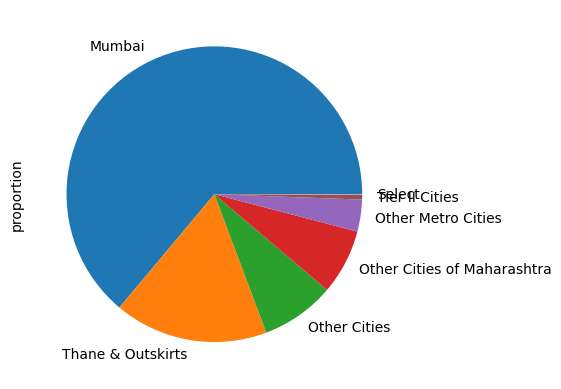

In [73]:
model_3['City'].value_counts(normalize=True).plot.pie()
plt.show()

# Bivariate Analysis

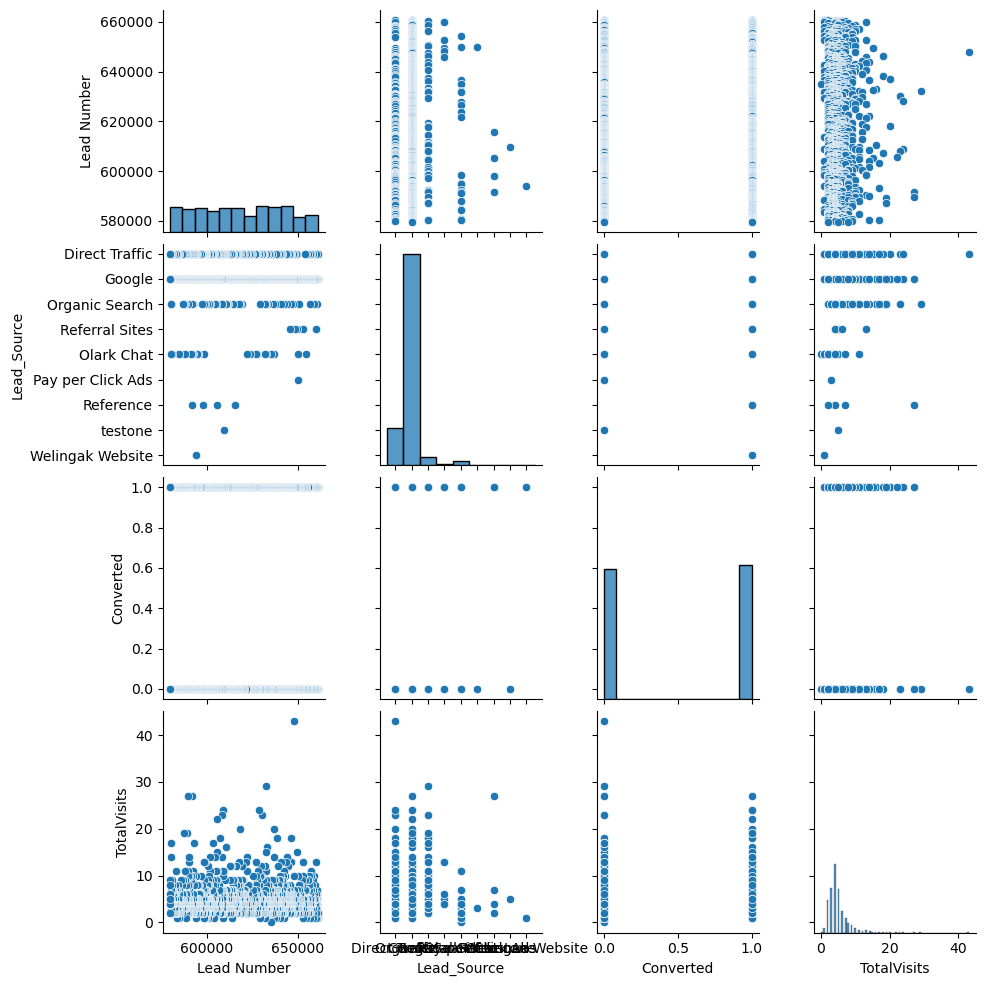

In [74]:
sns.pairplot(data=model_3,vars=['Lead Number', 'Lead_Source', 'Converted', 'TotalVisits'])
plt.show()

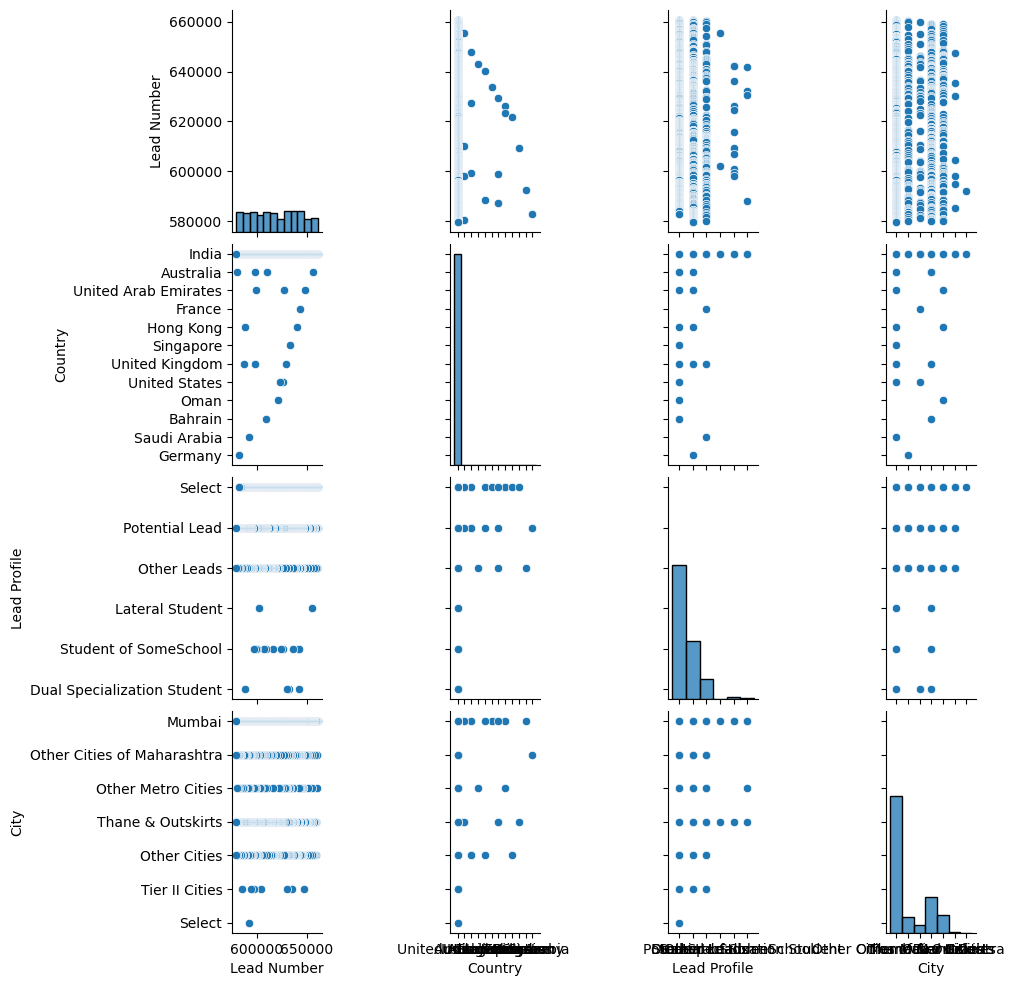

In [75]:
sns.pairplot(data=model_3,vars=['Lead Number','Country','Lead Profile', 'City' ])
plt.show()

In [76]:
#Co-realation matrix

In [77]:
model_3[['Lead Number', 'Converted', 'TotalVisits','Total Time Spent on Website', 'Page_Views_Per_Visit']].corr()*100

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit
Lead Number,100.000000,4.030834,0.842239,0.703330,6.353631
Converted,4.030834,100.000000,8.413478,46.657830,1.665977
TotalVisits,0.842239,8.413478,100.000000,2.427013,30.754454
Total Time Spent on Website,0.703330,46.657830,2.427013,100.000000,3.599580
Page_Views_Per_Visit,6.353631,1.665977,30.754454,3.599580,100.000000


In [78]:
model_3.Converted.value_counts(normalize=True)*100

Converted
1    50.655022
0    49.344978
Name: proportion, dtype: float64

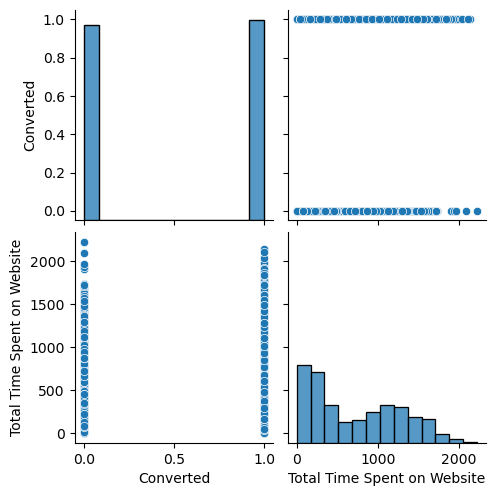

In [79]:
sns.pairplot(data=model_3,vars=['Converted','Total Time Spent on Website' ])
plt.show()

<Axes: >

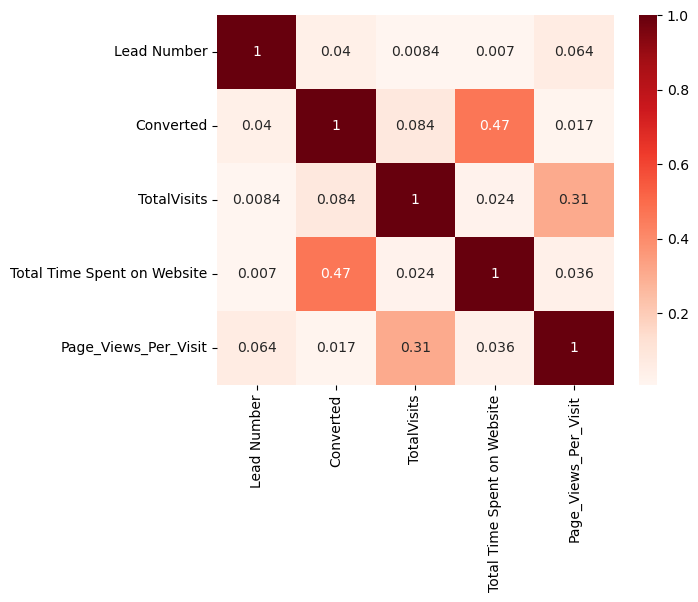

In [80]:
## Heatmap
sns.heatmap(model_3[['Lead Number', 'Converted', 'TotalVisits','Total Time Spent on Website', 'Page_Views_Per_Visit']].corr(),annot=True,cmap='Reds')

## coverted and 'Total Time Spent on Website' shows high corealation

In [82]:
#### Corealation : Lead Number--- Lead_Source

In [83]:
model_3.groupby(['Converted'])['Lead Number'].mean()

Converted
0    617689.898230
1    619539.613506
Name: Lead Number, dtype: float64

In [84]:
model_3.groupby(['Converted'])['Lead Number'].median()

Converted
0    615703.0
1    619775.5
Name: Lead Number, dtype: float64

<Axes: xlabel='Converted', ylabel='Lead Number'>

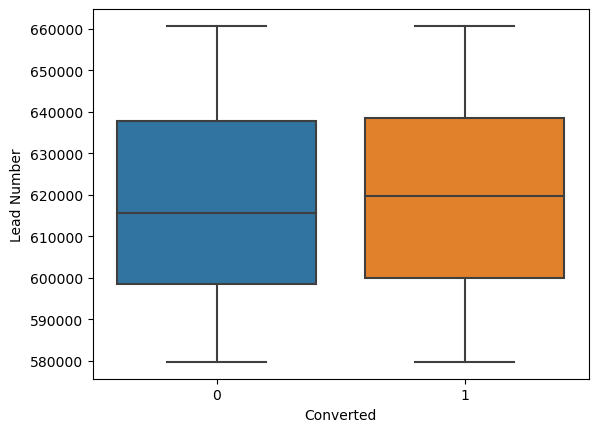

In [85]:
sns.boxplot(data=model_3,x='Converted',y='Lead Number')

In [86]:
#### Corealation : Converted--- Lead_Source

In [87]:
model_3.groupby('City')['Converted'].median()

City
Mumbai                         0.0
Other Cities                   0.0
Other Cities of Maharashtra    1.0
Other Metro Cities             1.0
Select                         1.0
Thane & Outskirts              0.0
Tier II Cities                 1.0
Name: Converted, dtype: float64

In [88]:
#### Corealation : Converted--- TotalVisits
model_3.groupby('Converted')['TotalVisits'].mean()

Converted
0    4.668142
1    5.215517
Name: TotalVisits, dtype: float64

In [89]:
model_3.groupby('Converted')['TotalVisits'].median()

Converted
0    4.0
1    4.0
Name: TotalVisits, dtype: float64

<Axes: xlabel='Converted', ylabel='TotalVisits'>

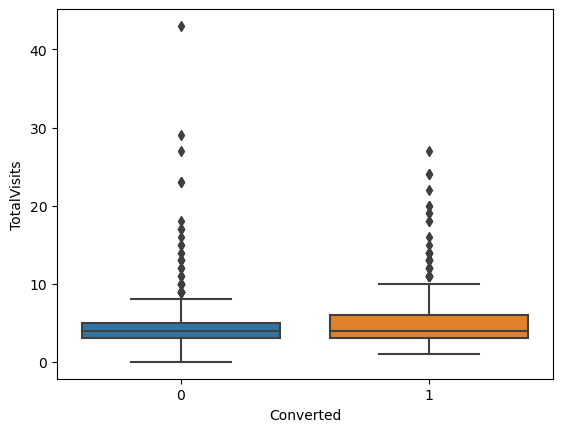

In [90]:
sns.boxplot(data=model_3,x='Converted',y='TotalVisits')         

In [91]:
#### Corealation : Converted--- TotalVisits

model_3.groupby('Converted')['Total Time Spent on Website'].mean()

#  outliers are observed

Converted
0    462.277286
1    977.303161
Name: Total Time Spent on Website, dtype: float64

In [92]:
model_3['Total Time Spent on Website'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

count    1374.000000
mean      723.163755
std       552.071520
min         0.000000
25%       223.000000
50%       605.500000
75%      1190.000000
90%      1519.500000
99%      1904.270000
max      2226.000000
Name: Total Time Spent on Website, dtype: float64

In [93]:
model_3.groupby('Converted')['Total Time Spent on Website'].median()

Converted
0     283.0
1    1049.0
Name: Total Time Spent on Website, dtype: float64

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

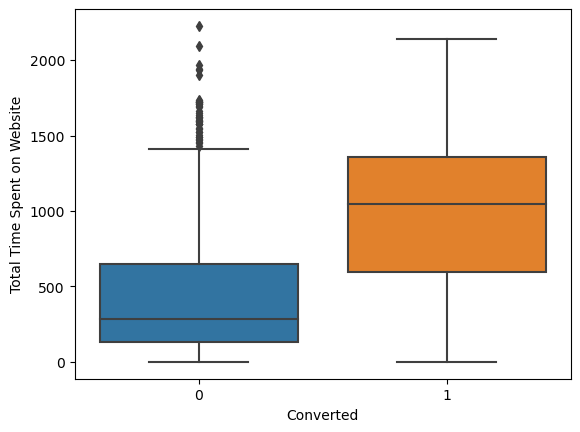

In [94]:
sns.boxplot(data=model_3,x='Converted',y='Total Time Spent on Website')

# Data Preparation¶

In [99]:
varlist=['Do Not Email','Do Not Call','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement']

def Binary_map(x):
    return x.map({'Yes':1,'No':0})
model_3[varlist]=model_3[varlist].apply(Binary_map)

In [100]:
model_3.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead_Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [101]:
model_3.head()

,Prospect ID,Lead Number,Lead Origin,Lead_Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,0,0,Select,Mumbai,0,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,0,Modified
20,c4419c99-b002-408b-a6fd-fa100716592c,660479,Landing Page Submission,Google,0,0,0,1.0,233,1.0,...,0,0,Interested in other courses,0,0,Select,Mumbai,0,0,Modified
22,8fd38b83-5c32-4277-bcfb-499f34a01c56,660471,Landing Page Submission,Google,0,0,1,1.0,1013,1.0,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,0,Modified
23,ecbc6e69-29a9-44bf-804a-13079ef301bc,660461,Landing Page Submission,Google,0,0,0,4.0,771,4.0,...,0,0,Ringing,0,0,Select,Mumbai,0,0,Email Link Clicked


# Create Dummy Variables

In [102]:
lo=pd.get_dummies(model_3['Lead Origin'],prefix='Lead_Origin')

ls=pd.get_dummies(model_3['Lead_Source'],prefix='Lead_Source')

la=pd.get_dummies(model_3['Last_Activity'],prefix='Last_Activity')
co=pd.get_dummies(model_3['Country'],prefix='Country')

sp=pd.get_dummies(model_3['Specialization'],prefix='Specialization')

ed=pd.get_dummies(model_3['How did you hear about X Education'],prefix='education')

Tags=pd.get_dummies(model_3['Tags'],prefix='Tags')

lp=pd.get_dummies(model_3['Lead Profile'],prefix='Lead_Profile')

City=pd.get_dummies(model_3['City'],prefix='City')

Notable_Activity=pd.get_dummies(model_3['Last Notable Activity'],prefix='Notable_Activity')

In [103]:
model_with_dummy=pd.concat([model_3,lo,ls,la,co,sp,ed,Tags,lp,City,Notable_Activity],axis=1)

# Removed orignal columns

In [104]:
model_with_dummy=model_with_dummy.drop(['Lead Origin', 'Lead_Source','Last_Activity', 'Country', 'Specialization','How did you hear about X Education', 'Tags', 'Lead Profile', 'City',
'Last Notable Activity'],axis=1)

In [105]:
model_with_dummy.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit,Search,Magazine,...,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Email Received,Notable_Activity_Had a Phone Conversation,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent,Notable_Activity_Unreachable,Notable_Activity_Unsubscribed
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,False,False,False,False,True,False,False,False,False,False
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,0,0,1,2.0,1640,2.0,0,0,...,False,False,False,False,True,False,False,False,False,False
20,c4419c99-b002-408b-a6fd-fa100716592c,660479,0,0,0,1.0,233,1.0,0,0,...,False,False,False,False,True,False,False,False,False,False
22,8fd38b83-5c32-4277-bcfb-499f34a01c56,660471,0,0,1,1.0,1013,1.0,0,0,...,False,False,False,False,True,False,False,False,False,False
23,ecbc6e69-29a9-44bf-804a-13079ef301bc,660461,0,0,0,4.0,771,4.0,0,0,...,True,False,False,False,False,False,False,False,False,False


# Data preaperation after adding dummies

In [106]:
model_with_dummy=model_with_dummy.drop(['Lead_Source_Olark Chat', 'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads','Last_Activity_Email Bounced','Last_Activity_Olark Chat Conversation','Last_Activity_Unreachable','Last_Activity_Unsubscribed','Tags_Busy','Tags_Diploma holder (Not Eligible)',
'Tags_Graduation in progress','Tags_In confusion whether part time or DLP', 'Tags_Interested in other courses','Tags_Lost to EINS', 'Tags_Lost to Others',
       'Tags_Not doing further education','Tags_Ringing','Tags_University not recognized','Tags_invalid number','Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given','Notable_Activity_Email Bounced','Notable_Activity_Unreachable', 'Notable_Activity_Unsubscribed'],  axis=1)

In [107]:
varlist1=['Lead_Origin_API', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google','Lead_Source_Reference', 'Lead_Source_Referral Sites',
          'Lead_Source_Welingak Website', 'Lead_Source_testone',
       'Last_Activity_Converted to Lead',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Email Received',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent',
       'Last_Activity_Visited Booth in Tradeshow','Country_Australia',
       'Country_Bahrain', 'Country_France', 'Country_Germany',
       'Country_Hong Kong', 'Country_India', 'Country_Oman',
       'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
          'education_Advertisements',
       'education_Email', 'education_Multiple Sources',
       'education_Online Search', 'education_Other', 'education_SMS',
       'education_Social Media', 'education_Student of SomeSchool',
       'education_Word Of Mouth','Tags_Already a student','Tags_Closed by Horizzon','Tags_Interested  in full time MBA',
       'Tags_Shall take in the next coming month', 'Tags_Still Thinking',
'Tags_Want to take admission but has financial problems','Tags_Will revert after reading the email', 'Tags_in touch with EINS',
'Lead_Profile_Dual Specialization Student','Lead_Profile_Lateral Student', 'Lead_Profile_Other Leads',
'Lead_Profile_Potential Lead', 'Lead_Profile_Select','Lead_Profile_Student of SomeSchool', 'City_Mumbai',
'City_Other Cities', 'City_Other Cities of Maharashtra','City_Other Metro Cities', 'City_Select', 'City_Thane & Outskirts',
'City_Tier II Cities','Notable_Activity_Email Link Clicked', 'Notable_Activity_Email Opened','Notable_Activity_Email Received',
'Notable_Activity_Had a Phone Conversation','Notable_Activity_Modified', 'Notable_Activity_Olark Chat Conversation',
'Notable_Activity_Page Visited on Website', 'Notable_Activity_SMS Sent']

          
    
def Binary_map(x):
    return x.map({True:1,False:0})
model_with_dummy[varlist1]=model_with_dummy[varlist1].apply(Binary_map)

In [108]:
model_with_dummy.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit,Search,Magazine,...,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Email Received,Notable_Activity_Had a Phone Conversation,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,0,0,1,2.0,1640,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
20,c4419c99-b002-408b-a6fd-fa100716592c,660479,0,0,0,1.0,233,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,8fd38b83-5c32-4277-bcfb-499f34a01c56,660471,0,0,1,1.0,1013,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
23,ecbc6e69-29a9-44bf-804a-13079ef301bc,660461,0,0,0,4.0,771,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Test-Train Split

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# Putting feature variable to X
X = model_with_dummy.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Email Received,Notable_Activity_Had a Phone Conversation,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,2.0,1640,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20,0,0,1.0,233,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,0,0,1.0,1013,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23,0,0,4.0,771,4.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [111]:
# Putting response variable to y
y = model_with_dummy['Converted']

y.head()

3     0
6     1
20    0
22    1
23    0
Name: Converted, dtype: int64

In [112]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page_Views_Per_Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page_Views_Per_Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,City_Thane & Outskirts,City_Tier II Cities,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Email Received,Notable_Activity_Had a Phone Conversation,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
4880,0,0,0.036761,1.277869,1.056063,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6922,0,0,-0.562014,-1.030401,-0.274617,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8792,0,0,0.635536,-1.062660,-1.339162,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2709,0,0,-0.262626,1.234858,0.390723,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1164,0,0,0.635536,1.190054,-1.339162,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [115]:
### Checking the Churn Rate
Converted = (sum(model_with_dummy['Converted'])/len(model_with_dummy['Converted'].index))*100
Converted

50.65502183406113

In [116]:
model_with_dummy_1=model_with_dummy.drop(['Prospect ID'],axis=1)

# Feature Selection Using RFE¶

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [118]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 10),
 ('Do Not Call', False, 58),
 ('TotalVisits', False, 40),
 ('Total Time Spent on Website', True, 1),
 ('Page_Views_Per_Visit', False, 66),
 ('Search', False, 71),
 ('Magazine', False, 70),
 ('Newspaper Article', False, 68),
 ('X Education Forums', False, 78),
 ('Newspaper', False, 79),
 ('Digital Advertisement', False, 75),
 ('Through Recommendations', False, 69),
 ('Receive More Updates About Our Courses', False, 77),
 ('Update me on Supply Chain Content', False, 72),
 ('Get updates on DM Content', False, 76),
 ('I agree to pay the amount through cheque', False, 73),
 ('A free copy of Mastering The Interview', False, 52),
 ('Lead_Origin_API', False, 49),
 ('Lead_Origin_Landing Page Submission', False, 48),
 ('Lead_Origin_Lead Add Form', False, 18),
 ('Lead_Source_Direct Traffic', False, 8),
 ('Lead_Source_Google', False, 53),
 ('Lead_Source_Reference', False, 26),
 ('Lead_Source_Referral Sites', True, 1),
 ('Lead_Source_Welingak Website', False, 57),
 ('L

In [121]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead_Source_Referral Sites',
       'Last_Activity_Email Link Clicked',
       'Last_Activity_Had a Phone Conversation', 'Last_Activity_SMS Sent',
       'Country_United Arab Emirates',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management', 'education_Advertisements',
       'education_Email', 'education_Multiple Sources',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Still Thinking',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email',
       'Lead_Profile_Lateral Student', 'Lead_Profile_Select',
       'Lead_Profile_Student of SomeSchool', 'City_Other Metro Cities',
       'Notable_Activity_Had a Phone Conversation',
       'Notable_Activity_SMS Sent'],
      dtype='object')

In [122]:
#Assessing the model with StatsModels
import statsmodels.api as sm

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  961
Model:                            GLM   Df Residuals:                      935
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -171.04
Date:                Mon, 17 Feb 2025   Deviance:                       342.08
Time:                        09:48:27   Pearson chi2:                 1.02e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6431
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.7311      0.316     -5.475      0.000      -2.351      -1.111
Total Time Spent on Website                                1.1238      0.153      7.350      0.000       0.824       1.423
Lead_Source_Referral Sites                                 1.6600      1.870      0.888      0.375      -2.005       5.325
Last_Activity_Email Link Clicked                           1.0194      0.748      1.363      0.173      -0.447       2.486
Last_Activity_Had a Phone Conversation                   -17.2280   2.42e+04     -0.001      0.999   -4.75e+04    4.75e+04
Last_Activity_SMS Sent                                     2.0846      0.568      3.669      0.000       0.971       3.198
Country_United Arab Emirates                               2.1502      1.899      1.132      0.258      -1.573       5.873
Specialization_Business Administration                    -0.8055      0.527     -1.527      0.127      -1.839       0.228
Specialization_Hospitality Management                     -1.3895      0.974     -1.427      0.154      -3.298       0.519
Specialization_Human Resource Management                  -0.7563      0.481     -1.572      0.116      -1.699       0.187
Specialization_IT Projects Management                      0.8618      0.566      1.524      0.128      -0.247       1.970
education_Advertisements                                   0.0897      0.842      0.107      0.915      -1.560       1.739
education_Email                                            0.7441      0.837      0.890      0.374      -0.895       2.384
education_Multiple Sources                                -0.9244      0.563     -1.641      0.101      -2.028       0.180
Tags_Already a student                                    -1.0198      1.112     -0.917      0.359      -3.199       1.160
Tags_Closed by Horizzon                                   39.9857   3.43e+04      0.001      0.999   -6.72e+04    6.72e+04
Tags_Interested  in full time MBA                        -23.8035   3.95e+04     -0.001      1.000   -7.74e+04    7.74e+04
Tags_Still Thinking                                      -25.4047   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Tags_Want to take admission but has financial problems     4.7454   2.64e+05    1.8e-05      1.000   -5.17e+05    5.17e+05
Tags_Will revert after reading the email                   5.8506      0.423     13.821      0.000       5.021       6.680
Lead_Profile_Lateral Student                              29.1729   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead_Profile_Select                                       -0.9862      0.315     -3.131      0.002      -1.603      -0.369
Lead_Pro

In [124]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

4880    0.996149
6922    0.020327
8792    0.050914
2709    0.996459
1164    1.000000
4515    0.093526
4556    0.998239
3972    0.006821
4377    0.063678
165     0.059342
dtype: float64

In [125]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99614926, 0.02032699, 0.05091364, 0.99645866, 1.        ,
       0.09352605, 0.99823856, 0.00682128, 0.06367836, 0.05934167])

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.996149,4880
1,0,0.020327,6922
2,0,0.050914,8792
3,1,0.996459,2709
4,1,1.000000,1164


# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [127]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.996149,4880,1
1,0,0.020327,6922,0
2,0,0.050914,8792,0
3,1,0.996459,2709,1
4,1,1.000000,1164,1


In [128]:
from sklearn import metrics

In [129]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[461  17]
 [ 44 439]]


In [130]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9365244536940687


# Checking VIFs

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last_Activity_SMS Sent,9.28
24,Notable_Activity_SMS Sent,9.04
23,Notable_Activity_Had a Phone Conversation,3.04
3,Last_Activity_Had a Phone Conversation,2.54
20,Lead_Profile_Select,1.76
18,Tags_Will revert after reading the email,1.65
17,Tags_Want to take admission but has financial ...,1.56
13,Tags_Already a student,1.41
21,Lead_Profile_Student of SomeSchool,1.33
0,Total Time Spent on Website,1.18


In [133]:
#need to remove 1st two features as it shows high VIF
col = col.drop(['Last_Activity_SMS Sent','Notable_Activity_SMS Sent'],1)
col

Index(['Total Time Spent on Website', 'Lead_Source_Referral Sites',
       'Last_Activity_Email Link Clicked',
       'Last_Activity_Had a Phone Conversation',
       'Country_United Arab Emirates',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management', 'education_Advertisements',
       'education_Email', 'education_Multiple Sources',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Still Thinking',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email',
       'Lead_Profile_Lateral Student', 'Lead_Profile_Select',
       'Lead_Profile_Student of SomeSchool', 'City_Other Metro Cities',
       'Notable_Activity_Had a Phone Conversation'],
      dtype='object')

In [134]:
###########

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  961
Model:                            GLM   Df Residuals:                      937
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -181.40
Date:                Mon, 17 Feb 2025   Deviance:                       362.80
Time:                        09:48:27   Pearson chi2:                 1.09e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6353
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.2974      0.287     -4.523      0.000      -1.860      -0.735
Total Time Spent on Website                                1.1325      0.148      7.649      0.000       0.842       1.423
Lead_Source_Referral Sites                                 1.2717      1.768      0.719      0.472      -2.194       4.737
Last_Activity_Email Link Clicked                           0.4230      0.744      0.569      0.569      -1.034       1.881
Last_Activity_Had a Phone Conversation                   -17.7993   2.43e+04     -0.001      0.999   -4.77e+04    4.77e+04
Country_United Arab Emirates                               2.9865      1.575      1.896      0.058      -0.101       6.074
Specialization_Business Administration                    -0.8841      0.518     -1.708      0.088      -1.899       0.131
Specialization_Hospitality Management                     -1.2911      1.068     -1.209      0.227      -3.384       0.802
Specialization_Human Resource Management                  -0.7819      0.468     -1.669      0.095      -1.700       0.136
Specialization_IT Projects Management                      0.7813      0.539      1.450      0.147      -0.275       1.838
education_Advertisements                                   0.4615      0.776      0.594      0.552      -1.060       1.983
education_Email                                            1.0453      0.820      1.275      0.202      -0.562       2.653
education_Multiple Sources                                -0.9899      0.549     -1.802      0.072      -2.067       0.087
Tags_Already a student                                    -1.3391      1.123     -1.192      0.233      -3.541       0.863
Tags_Closed by Horizzon                                   40.1872   3.44e+04      0.001      0.999   -6.74e+04    6.75e+04
Tags_Interested  in full time MBA                        -24.2011   3.96e+04     -0.001      1.000   -7.76e+04    7.75e+04
Tags_Still Thinking                                      -24.7234   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Tags_Want to take admission but has financial problems     4.3772   2.64e+05   1.66e-05      1.000   -5.17e+05    5.17e+05
Tags_Will revert after reading the email                   5.8174      0.411     14.159      0.000       5.012       6.623
Lead_Profile_Lateral Student                              29.0650   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead_Profile_Select                                       -0.8457      0.306     -2.760      0.006      -1.446      -0.245
Lead_Profile_Student of SomeSchool                       -22.7441   8.14e+04     -0.000      1.000    -1.6e+05     1.6e+05
City_Oth

In [136]:
y_train_pred_1=res.predict(X_train_sm)
y_train_pred_1[:10]

4880    0.997445
6922    0.035231
8792    0.075802
2709    0.993774
1164    1.000000
4515    0.056208
4556    0.996425
3972    0.010407
4377    0.035119
165     0.057673
dtype: float64

In [137]:
y_train_pred_1=y_train_pred_1.values.reshape(-1)
y_train_pred_1[:10]

array([0.99744528, 0.03523071, 0.07580214, 0.9937744 , 1.        ,
       0.05620799, 0.99642549, 0.01040661, 0.03511947, 0.05767259])

In [138]:
y_train_pred_final_1 = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred_1})
y_train_pred_final_1['Prospect ID'] = y_train.index
y_train_pred_final_1.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.997445,4880
1,0,0.035231,6922
2,0,0.075802,8792
3,1,0.993774,2709
4,1,1.000000,1164


In [139]:
y_train_pred_final['Converted_Prob'] = y_train_pred_1

In [140]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.997445,4880,1
1,0,0.035231,6922,0
2,0,0.075802,8792,0
3,1,0.993774,2709,1
4,1,1.000000,1164,1


In [141]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9365244536940687


In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF1'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF1'] = round(vif['VIF1'], 2)
vif = vif.sort_values(by = "VIF1", ascending = False)
vif

,Features,VIF1
22,Notable_Activity_Had a Phone Conversation,3.04
3,Last_Activity_Had a Phone Conversation,2.54
16,Tags_Want to take admission but has financial ...,1.56
19,Lead_Profile_Select,1.48
17,Tags_Will revert after reading the email,1.43
12,Tags_Already a student,1.41
20,Lead_Profile_Student of SomeSchool,1.33
7,Specialization_Human Resource Management,1.18
0,Total Time Spent on Website,1.17
11,education_Multiple Sources,1.10


In [143]:
#confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[465  13]
 [ 48 435]]


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9365244536940687

# Metrics beyond simply accuracy

In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.9006211180124224

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.9728033472803347

In [148]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.027196652719665274


In [149]:
# positive predictive value 
print (TP / float(TP+FP))

0.9709821428571429


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064327485380117


# Plotting the ROC Curve

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

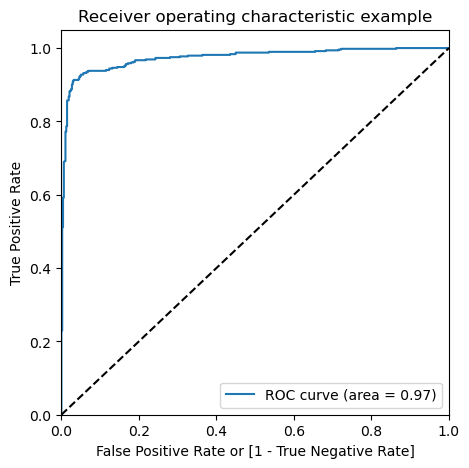

In [153]:
draw_roc( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding Optimal Cutoff Point

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.997445,4880,1,1,1,1,1,1,1,1,1,1,1
1,0,0.035231,6922,0,1,0,0,0,0,0,0,0,0,0
2,0,0.075802,8792,0,1,0,0,0,0,0,0,0,0,0
3,1,0.993774,2709,1,1,1,1,1,1,1,1,1,1,1
4,1,1.000000,1164,1,1,1,1,1,1,1,1,1,1,1


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.502601  1.000000  0.000000
0.1   0.1  0.851197  0.973085  0.728033
0.2   0.2  0.896982  0.948240  0.845188
0.3   0.3  0.926119  0.937888  0.914226
0.4   0.4  0.937565  0.921325  0.953975
0.5   0.5  0.936524  0.900621  0.972803
0.6   0.6  0.930281  0.886128  0.974895
0.7   0.7  0.928200  0.877847  0.979079
0.8   0.8  0.922997  0.867495  0.979079
0.9   0.9  0.918835  0.853002  0.985356


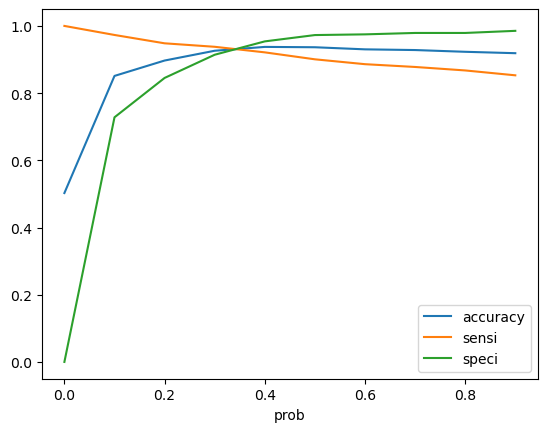

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.35 is the optimum point to take it as a cutoff probability

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.997445,4880,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.035231,6922,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.075802,8792,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.993774,2709,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1.000000,1164,1,1,1,1,1,1,1,1,1,1,1,1


In [158]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9344432882414152

In [190]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[447,  31],
       [ 32, 451]], dtype=int64)

In [191]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9337474120082816

In [193]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06485355648535565


In [194]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9356846473029046


In [195]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9331941544885177


# Precision and recall tradeoff

In [180]:
from sklearn.metrics import precision_recall_curve

In [183]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0      1
 1      0
 2      0
 3      1
 4      1
       ..
 956    0
 957    1
 958    0
 959    1
 960    1
 Name: Converted, Length: 961, dtype: int64,
 0      1
 1      0
 2      0
 3      1
 4      1
       ..
 956    0
 957    1
 958    0
 959    1
 960    0
 Name: predicted, Length: 961, dtype: int64)

In [184]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

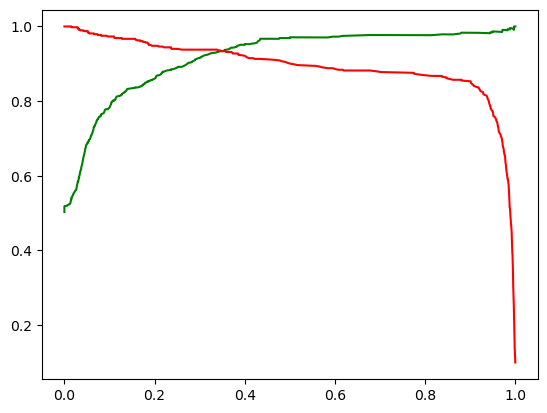

In [185]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set¶

In [165]:
X_test[['TotalVisits','Total Time Spent on Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page_Views_Per_Visit']])

In [166]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead_Source_Referral Sites,Last_Activity_Email Link Clicked,Last_Activity_Had a Phone Conversation,Country_United Arab Emirates,Specialization_Business Administration,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,education_Advertisements,...,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Lead_Profile_Lateral Student,Lead_Profile_Select,Lead_Profile_Student of SomeSchool,City_Other Metro Cities,Notable_Activity_Had a Phone Conversation
6780,-0.455276,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2392,1.528523,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2109,0.570121,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1791,-0.044001,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6488,-1.052649,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [181]:
X_test_sm = sm.add_constant(X_test)

# Prediction on test set

In [168]:
y_test_pred = res.predict(X_test_sm)

In [169]:
y_test_pred[:10]

6780    6.545771e-02
2392    9.955279e-01
2109    9.876766e-01
1791    4.406612e-02
6488    7.042472e-13
3745    3.581157e-02
3991    2.530077e-02
2812    4.891962e-01
5734    5.674965e-03
3549    9.958070e-01
dtype: float64

In [170]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
6780,6.545771e-02
2392,9.955279e-01
2109,9.876766e-01
1791,4.406612e-02
6488,7.042472e-13


In [171]:
y_test_df = pd.DataFrame(y_test)

In [172]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [173]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [174]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [175]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,6780,6.545771e-02
1,1,2392,9.955279e-01
2,1,2109,9.876766e-01
3,0,1791,4.406612e-02
4,0,6488,7.042472e-13


In [176]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [178]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,6780,6.545771e-02
1,1,2392,9.955279e-01
2,1,2109,9.876766e-01
3,0,1791,4.406612e-02
4,0,6488,7.042472e-13


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [187]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,6780,6.545771e-02,0
1,1,2392,9.955279e-01,1
2,1,2109,9.876766e-01,1
3,0,1791,4.406612e-02,0
4,0,6488,7.042472e-13,0


In [188]:
# check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9055690072639225

In [196]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[187,  13],
       [ 26, 187]], dtype=int64)

In [197]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [198]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8779342723004695

In [199]:
# calculate specificity
TN / float(TN+FP)

0.935